<a href="https://colab.research.google.com/github/andresbeltranb/ANDRES_BELTRANB/blob/main/Copia_de_Clase_1_Taller_1_Datos_Con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clase 1 (2h): Introducción a Jupyter/Colab y al entorno de análisis de datos en Python

**Objetivos de la sesión**
- Configurar y usar Google Colab como entorno de trabajo.
- Comprender la estructura de un notebook (celdas de código y Markdown) y buenas prácticas.
- Importar y verificar librerías clave para análisis de datos: `numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`.
- Cargar un `.csv` y realizar una exploración inicial.
- Practicar *slicing* (filas/columnas) y conteo de valores faltantes.



## Flujo de trabajo recomendado (Colab ⇄ GitHub)
1. Abre este notebook en **Google Colab**.
2. Guarda una copia en tu repositorio: `Archivo → Guardar una copia en GitHub`.
3. Versiona tu trabajo repitiendo el guardado al final de la clase.



## Notebooks: estructura y ejecución
- Celdas **Código** y **Markdown**.
- Ejecuta con `Shift + Enter`.
- Modos: **Editar** (borde verde) y **Comando** (borde azul).  
  Atajos: `A` (arriba), `B` (abajo), `M` (Markdown), `Y` (Código), `D D` (borrar).


In [ ]:
print('Hola, Notebook 👋')
1 + 2

Hola, Notebook 👋


3

In [ ]:
print(1 + 2)
1 + 3

3


4

In [ ]:
1 + 2
1 + 3;  # suprime la última salida


## Buenas prácticas
- Indentación 4 espacios · Comentarios que expliquen el “por qué” · Longitud ≤ 100 · Bloques lógicos.


In [ ]:

resultado = []
for x in range(10):
    for y in range(5):
        if x * y > 10:
            resultado.append((x, y))
print(resultado)


[(3, 4), (4, 3), (4, 4), (5, 3), (5, 4), (6, 2), (6, 3), (6, 4), (7, 2), (7, 3), (7, 4), (8, 2), (8, 3), (8, 4), (9, 2), (9, 3), (9, 4)]



## Librerías clave
`numpy`, `pandas`, `matplotlib`, `seaborn`, `statsmodels`


In [ ]:

# !pip install numpy pandas matplotlib seaborn statsmodels --quiet  # Descomenta si hace falta
import sys, platform
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
print("Python:", sys.version.split()[0], "|", platform.platform())
print("NumPy:", np.__version__, "| pandas:", pd.__version__, "| matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__, "| statsmodels:", sm.__version__)


Python: 3.11.13 | Linux-6.1.123+-x86_64-with-glibc2.35
NumPy: 2.0.2 | pandas: 2.2.2 | matplotlib: 3.10.0
seaborn: 0.13.2 | statsmodels: 0.14.5


## Cargar datos (elige una opción)

In [52]:


# URL directa al archivo .csv de calidad de vino tinto
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Leer el archivo CSV especificando el separador de punto y coma
df = pd.read_csv(url, sep=';')

# Mostrar las primeras 5 filas para verificar que se cargó correctamente
print("Datos cargados exitosamente:")
df.head()


Datos cargados exitosamente:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

# Opción C) Leer desde Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# da = pd.read_csv('/content/drive/MiCarpeta/datos.csv')
# da.head()


### Opción D) Dataset de ejemplo

In [ ]:

import numpy as np, pandas as pd
np.random.seed(42)
n = 250
da = pd.DataFrame({
    "SEQN": np.arange(1, n+1),
    "RIAGENDR": np.random.choice([1, 2], size=n),
    "RIDAGEYR": np.random.randint(18, 80, size=n),
    "BMXWT": np.round(np.random.normal(70, 12, size=n), 1),
    "BMXHT": np.round(np.random.normal(168, 10, size=n), 1),
})
da["BMXBMI"] = np.round(da["BMXWT"] / (da["BMXHT"]/100)**2, 1)
da.loc[np.random.choice(da.index, size=10, replace=False), "BMXWT"] = np.nan
da.head()


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


## Exploración inicial

In [ ]:

print("shape:", da.shape)
print("columnas:", list(da.columns))
display(da.dtypes)
display(da.head())
display(da.describe(include='all'))


shape: (250, 6)
columnas: ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI']


,0
SEQN,int64
RIAGENDR,int64
RIDAGEYR,int64
BMXWT,float64
BMXHT,float64
BMXBMI,float64


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
0,1,1,79,56.2,150.4,24.8
1,2,2,74,86.7,183.0,25.9
2,3,1,69,59.7,158.9,23.6
3,4,1,30,57.7,173.6,19.1
4,5,1,58,80.6,160.5,31.3


,SEQN,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI
count,250.000000,250.000000,250.000000,240.000000,250.000000,250.000000
mean,125.500000,1.496000,50.088000,69.407083,168.411600,24.830400
std,72.312977,0.500987,18.063038,13.028989,10.664936,5.719827
min,1.000000,1.000000,18.000000,29.600000,140.200000,10.200000
25%,63.250000,1.000000,36.000000,60.775000,160.800000,21.100000
50%,125.500000,1.000000,50.000000,69.100000,168.700000,24.200000
75%,187.750000,2.000000,66.000000,79.550000,175.100000,28.175000
max,250.000000,2.000000,79.000000,108.200000,197.800000,49.500000


## *Slicing* (filas y columnas)

In [ ]:

w = da["RIDAGEYR"]; x = da.loc[:, "RIDAGEYR"]; y = da.RIDAGEYR
z = da.iloc[:, da.columns.get_loc("RIDAGEYR")]
print("Max RIDAGEYR (cuatro formas):", w.max(), x.max(), y.max(), z.max())
fila4 = da.iloc[3, :]; fila4


Max RIDAGEYR (cuatro formas): 79 79 79 79


,3
SEQN,4.0
RIAGENDR,1.0
RIDAGEYR,30.0
BMXWT,57.7
BMXHT,173.6
BMXBMI,19.1


## Faltantes

In [ ]:

faltantes_bmxwt = pd.isnull(da["BMXWT"]).sum()
no_faltantes_bmxwt = pd.notnull(da["BMXWT"]).sum()
print("BMXWT → faltantes:", faltantes_bmxwt, "| no faltantes:", no_faltantes_bmxwt)


BMXWT → faltantes: 10 | no faltantes: 240


## Visualización rápida

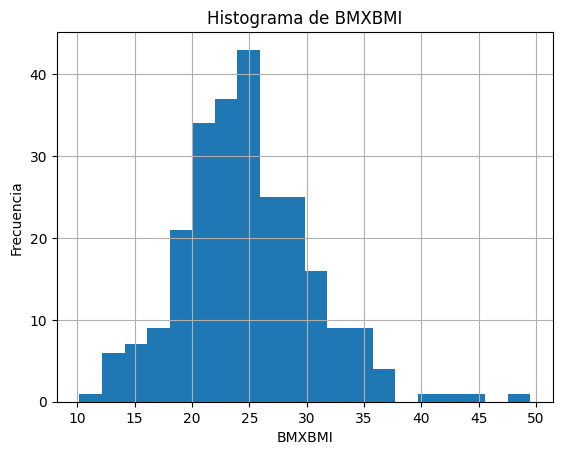

In [ ]:

col = "BMXBMI" if "BMXBMI" in da.columns else da.select_dtypes(include='number').columns[0]
plt.figure(); da[col].hist(bins=20)
plt.title(f"Histograma de {col}"); plt.xlabel(col); plt.ylabel("Frecuencia"); plt.show()



## Ejercicios (para tu Collab)
1) Reporta `shape`, `columns`, `dtypes`, `head`, `describe`.  
2) Dos variables numéricas: media, mediana, desviación estándar y cuantiles (25%, 50%, 75%).  
3) Tabla de frecuencias para una variable categórica.  
4) Columnas con valores faltantes y conteo por variable.  
5) (Opcional) Nueva columna derivada y su distribución.



### Respuestas del estudiante (Markdown)
<div class="response-box">
Escribe aquí tu análisis y conclusiones para los puntos 1–5.
</div>


In [2]:
# Usar la base de datos https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Respuestas del estudiante (12065)
# TODO: abajo se detalla el codigo por puntos

In [25]:
try:
    df = pd.read_csv('winequality-red.csv', sep=';')
    print("DataFrame cargado correctamente con el delimitador ';'.\n")
except FileNotFoundError:
    print("Error: El archivo 'winequality-red.csv' no fue encontrado.")

DataFrame cargado correctamente con el delimitador ';'.



In [26]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [32]:
# 2. Reportar las características del DataFrame
if 'df' in locals():
    print("--- Reporte de características ---")
    print("\nForma (filas, columnas):")
    print(df.shape)

    print("\nNombres de las columnas:")
    print(df.columns.tolist())

    print("\nTipos de datos de cada columna:")
    print(df.dtypes)

    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())

    print("\nResumen estadístico de variables numéricas:")
    print(df.describe())

--- Reporte de características ---

Forma (filas, columnas):
(1599, 12)

Nombres de las columnas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Tipos de datos de cada columna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Primeras 5 filas del DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8     

In [51]:
import pandas as pd

# --- Paso 1: Cargar el dataset con el delimitador correcto (punto y coma) ---
try:
    df = pd.read_csv('winequality-red.csv', sep=';')
    print("DataFrame cargado correctamente con el delimitador ';'.\n")
except FileNotFoundError:
    print("Error: El archivo 'winequality-red.csv' no fue encontrado.")

# --- Paso 2: Reportar las características del DataFrame ---
if 'df' in locals():
    print("--- Reporte de características ---")
    print("\nForma (filas, columnas):")
    print(df.shape)

    print("\nNombres de las columnas:")
    print(df.columns.tolist())

    print("\nTipos de datos de cada columna:")
    print(df.dtypes)

    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())

    print("\nResumen estadístico de variables numéricas:")
    print(df.describe())

    # --- Paso 3: Análisis de dos variables numéricas ---
    print("\n\n--- Análisis de variables numéricas ---")

    # Ahora los nombres de las columnas deberían funcionar correctamente
    variables_numericas = ['fixed acidity', 'pH']
    for var in variables_numericas:
        print(f"\nAnálisis para la variable: {var}")
        print(f"Media: {df[var].mean():.2f}")
        print(f"Mediana: {df[var].median():.2f}")
        print(f"Desviación estándar: {df[var].std():.2f}")
        print("Cuantiles (25%, 50%, 75%):")
        print(df[var].quantile([0.25, 0.5, 0.75]))

    # --- Paso 4: Tabla de frecuencias para una variable categórica ---
    print("\n\n--- Tabla de frecuencias ---")
    print("Tabla de frecuencias para la variable 'quality':")
    print(df['quality'].value_counts().sort_index())

    # --- Paso 5: Columnas con valores faltantes ---
    print("\n\n--- Valores faltantes ---")
    print("Conteo de valores faltantes por columna:")
    print(df.isnull().sum())

    # --- Paso 6: (Opcional) Nueva columna derivada ---
    print("\n\n--- Nueva columna derivada ---")

    def clasificar_calidad(calidad):
        if calidad < 5:
            return 'Baja'
        elif calidad < 7:
            return 'Media'
        else:
            return 'Alta'

    df['quality_category'] = df['quality'].apply(clasificar_calidad)

    print("Distribución de la nueva columna 'quality_category':")
    print(df['quality_category'].value_counts())

DataFrame cargado correctamente con el delimitador ';'.

--- Reporte de características ---

Forma (filas, columnas):
(1599, 12)

Nombres de las columnas:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Tipos de datos de cada columna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Primeras 5 filas del DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88        